In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
%matplotlib inline

In [66]:
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')
df = pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\data.csv", encoding='ISO-8859-1')


In [67]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [69]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [70]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [71]:
df = df[(df['UnitPrice']> 0) & (df['Quantity']>0)]

In [72]:
df = df.dropna(subset=['CustomerID', 'Description'])
df.isnull().sum().sum()

0

In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.shape[0]

392692

In [75]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [76]:
most_recent_purchase = max(df['InvoiceDate'])
most_recent_purchase

Timestamp('2011-12-09 12:50:00')

In [77]:

df['Recency'] = df['InvoiceDate'].apply(lambda row: (most_recent_purchase - row).days)

<Axes: xlabel='Recency', ylabel='Count'>

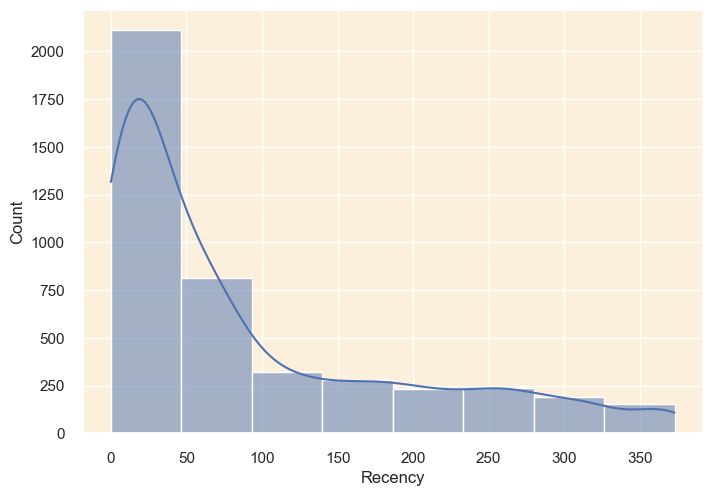

In [78]:
df_recent = df.groupby('CustomerID')['Recency'].min()
sns.histplot(df_recent,bins=8,kde=True)

<Axes: xlabel='InvoiceDate', ylabel='Count'>

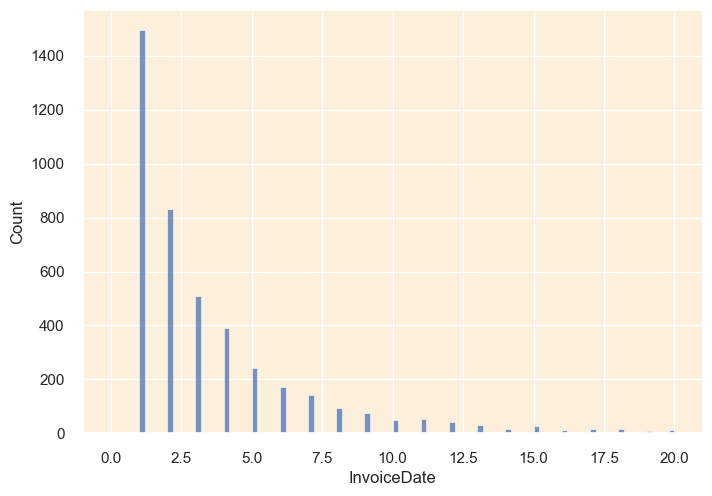

In [79]:
df_freq = df.groupby('CustomerID')['InvoiceDate'].nunique()
sns.histplot(df_freq,bins=100,binrange=(0,20))

In [80]:
df['Amount'] = df['UnitPrice']*df['Quantity']

<Axes: xlabel='Amount', ylabel='Count'>

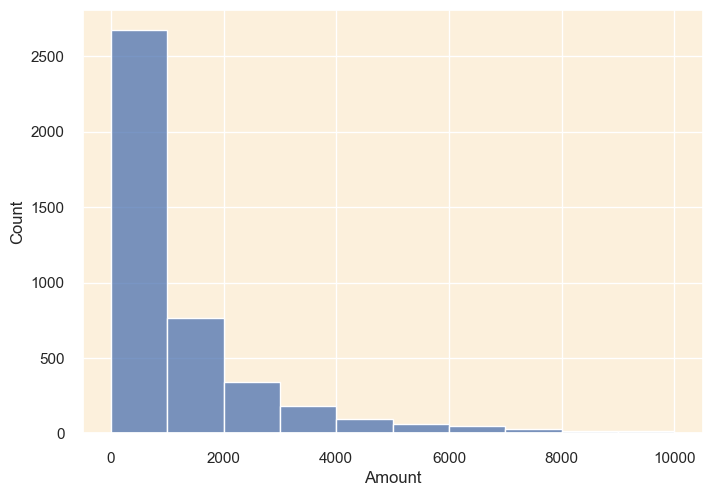

In [81]:
df_monetary = df.groupby('CustomerID')['Amount'].sum()
sns.histplot(df_monetary,bins=10,binrange=(0,10000))

In [82]:
rfm_df = pd.DataFrame(columns=['CustomerID'])

In [83]:
rfm_df['CustomerID'] = df_recent.index
rfm_df = rfm_df.merge(df_recent,on='CustomerID')
rfm_df = rfm_df.merge(df_freq,on='CustomerID')
rfm_df = rfm_df.merge(df_monetary,on='CustomerID')

In [84]:
rfm_df.rename(columns={'InvoiceDate':'Frequency'},inplace=True)

In [85]:
rfm_df

,CustomerID,Recency,Frequency,Amount
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4333,18280.0,277,1,180.60
4334,18281.0,180,1,80.82
4335,18282.0,7,2,178.05
4336,18283.0,3,16,2045.53


In [86]:
rfm_df.describe()


,CustomerID,Recency,Frequency,Amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.250807,2048.688081
std,1721.808492,100.014169,7.635202,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.000000,5.000000,1660.597500
max,18287.000000,373.000000,210.000000,280206.020000


<Axes: xlabel='Recency', ylabel='Frequency'>

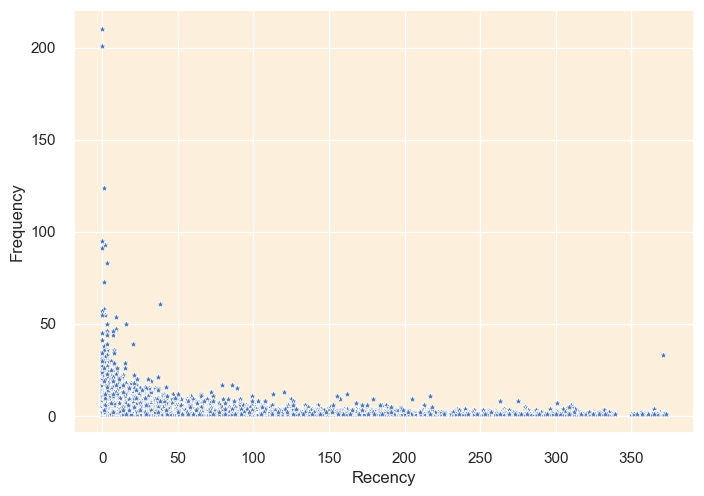

In [87]:
sns.scatterplot(data=rfm_df, x="Recency", y="Frequency",marker='*')

[(0.0, 10000.0)]

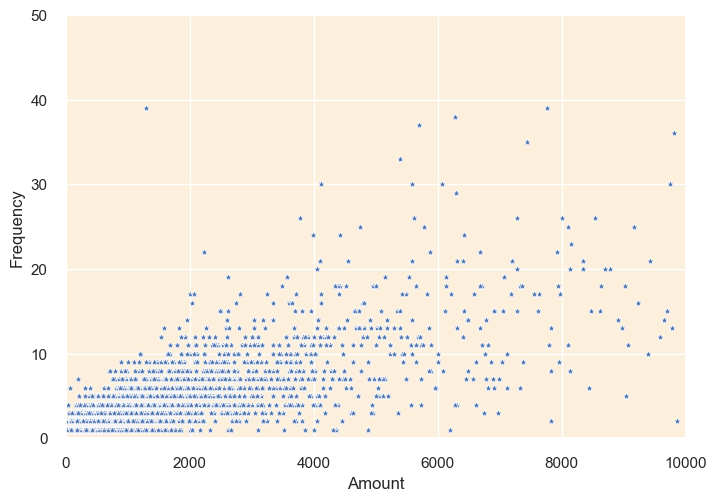

In [88]:
ax = sns.scatterplot(data=rfm_df, x="Amount", y="Frequency",marker='*')
ax.set(ylim=(0,50))
ax.set(xlim=(0,10000))

Recency: 


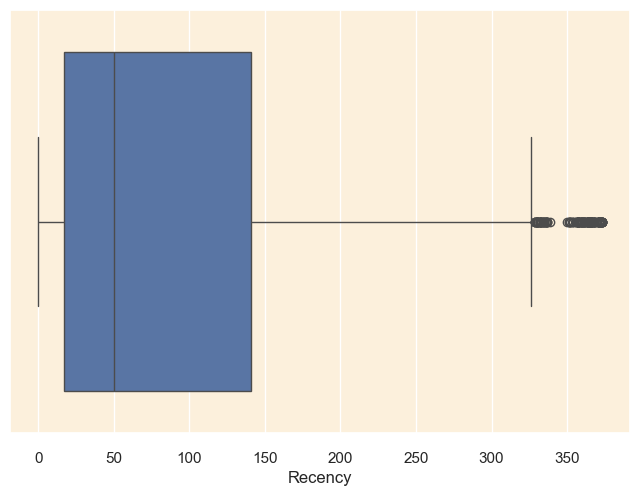

Frequency: 


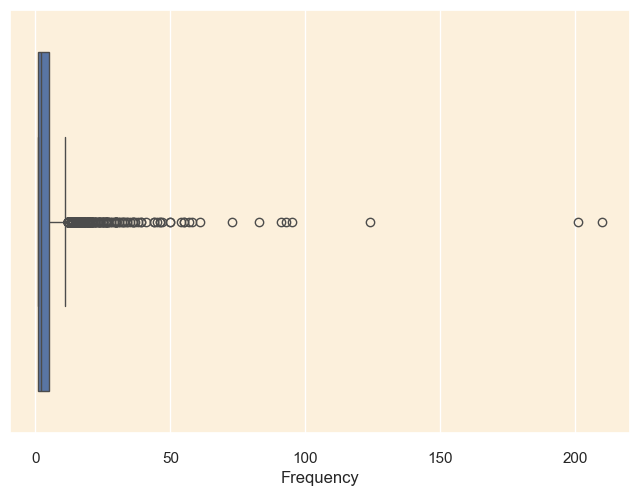

Amount: 


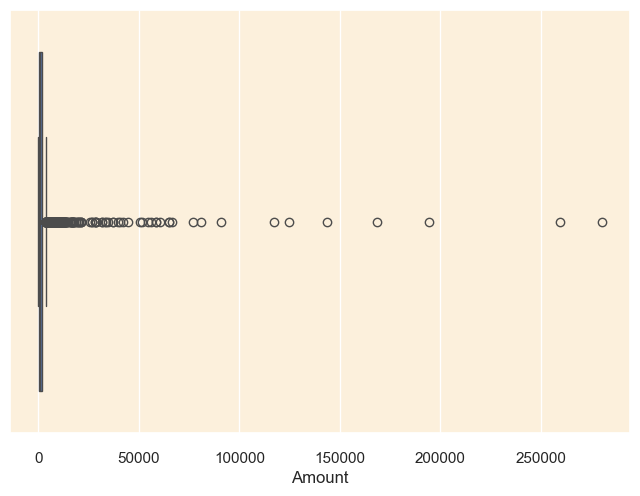

In [89]:
list1 = ['Recency','Frequency','Amount']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()

In [90]:
rfm_df.drop('CustomerID',axis=1,inplace=True)

In [91]:
rfm_df

,Recency,Frequency,Amount
0,325,1,77183.60
1,1,7,4310.00
2,74,4,1797.24
3,18,1,1757.55
4,309,1,334.40
...,...,...,...
4333,277,1,180.60
4334,180,1,80.82
4335,7,2,178.05
4336,3,16,2045.53


In [92]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    copy = data.copy()
    print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print(lower_range,upper_range)
    #np.where(condition, true, false)
    copy[col] = np.where(
    copy[col] > upper_range,
    upper_range,
    np.where(
        copy[col] < lower_range,
        lower_range,
        copy[col]
        )
    )

    return copy

In [93]:
final_recency = removeOutliers(rfm_df,'Recency')
final_frequency = removeOutliers(final_recency,'Frequency')
final_rfm_df = removeOutliers(final_frequency,'Amount')

IQR value for column Recency is: 124.0
-169.0 327.0
IQR value for column Frequency is: 4.0
-5.0 11.0
IQR value for column Amount is: 1354.1149999999998
-1724.6899999999996 3691.7699999999995


Recency before and after outlier capping using IQR


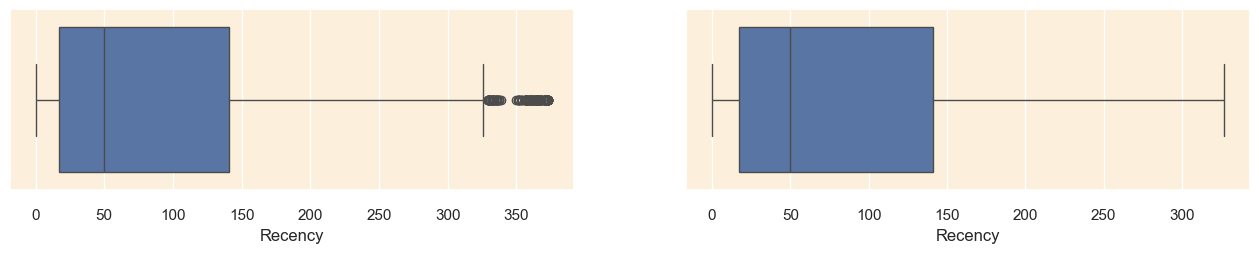

Frequency before and after outlier capping using IQR


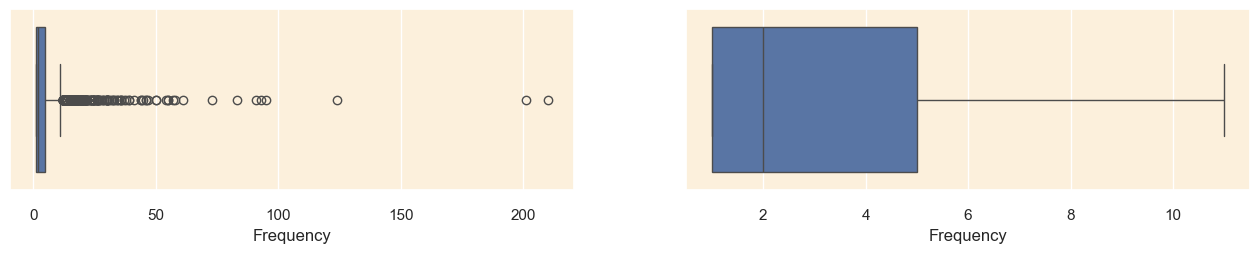

Amount before and after outlier capping using IQR


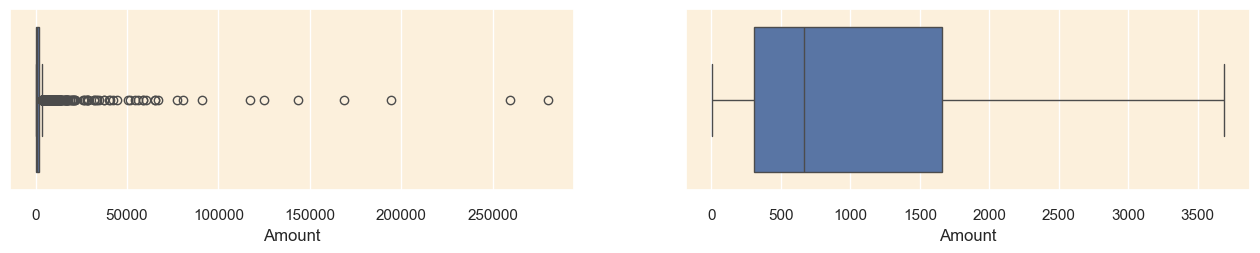

In [94]:
i = 1 
for col in ['Recency','Frequency','Amount']:
    print(col+' before and after outlier capping using IQR')
    plt.figure(figsize=(16,8))
    plt.subplot(3,2,i)
    sns.boxplot(x=rfm_df[col])
    plt.subplot(3,2,i+1)
    sns.boxplot(x=final_rfm_df[col])
    ++i
    #plt.set_title(col)
    plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler

cols = final_rfm_df.columns

scaler = StandardScaler()

rfm = scaler.fit_transform(final_rfm_df)

rfm_scaled = pd.DataFrame(rfm, columns=[cols])

In [96]:
rfm_scaled.describe()

,Recency,Frequency,Amount
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,7.043185e-17,9.008725e-18,-1.703468e-16
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.306408e-01,-8.180490e-01,-1.007514e+00
25%,-7.557227e-01,-8.180490e-01,-7.434978e-01
50%,-4.161758e-01,-4.883976e-01,-4.277179e-01
75%,5.201504e-01,5.005563e-01,4.374385e-01
max,2.433960e+00,2.478464e+00,2.208843e+00


Text(0, 0.5, 'Inertia')

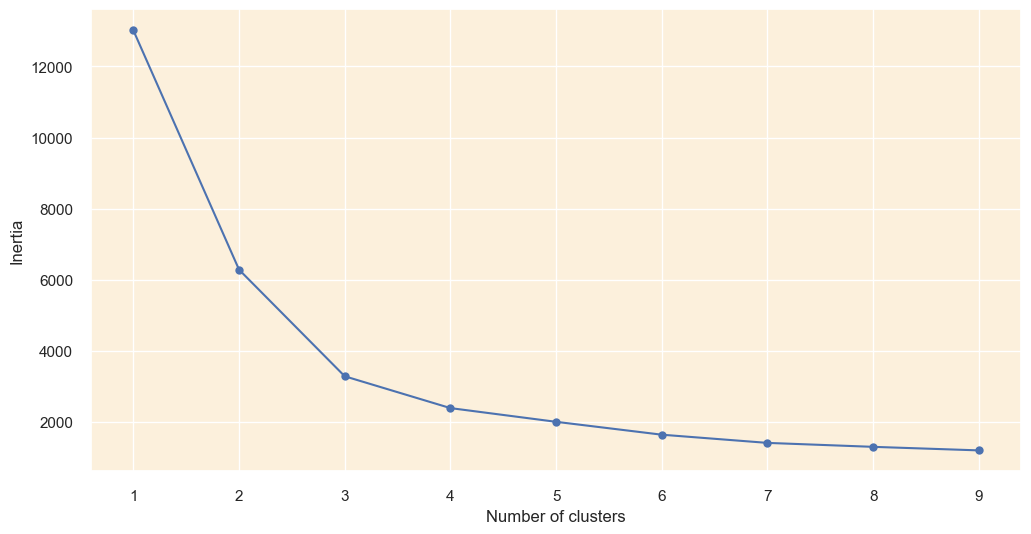

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',n_init="auto")
    kmeans.fit(rfm_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [98]:
kmeans = KMeans( n_clusters = 3, init='k-means++',n_init="auto")
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [99]:
print(silhouette_score(rfm_scaled, kmeans.labels_, metric='euclidean'))

0.5092869612125239


In [100]:
pred = kmeans.predict(rfm_scaled)
rfm_cluster = final_rfm_df.copy()
rfm_cluster['cluster'] = pred

In [101]:
rfm_cluster

,Recency,Frequency,Amount,cluster
0,325.0,1.0,3691.77,2
1,1.0,7.0,3691.77,0
2,74.0,4.0,1797.24,1
3,18.0,1.0,1757.55,1
4,309.0,1.0,334.40,2
...,...,...,...,...
4333,277.0,1.0,180.60,2
4334,180.0,1.0,80.82,2
4335,7.0,2.0,178.05,1
4336,3.0,11.0,2045.53,0


<Axes: xlabel='Recency', ylabel='Frequency'>

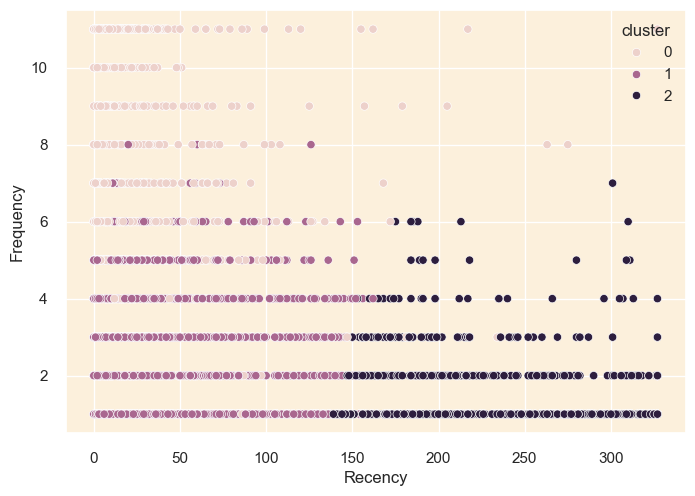

In [102]:
sns.scatterplot(data=rfm_cluster, x="Recency", y="Frequency",hue='cluster')

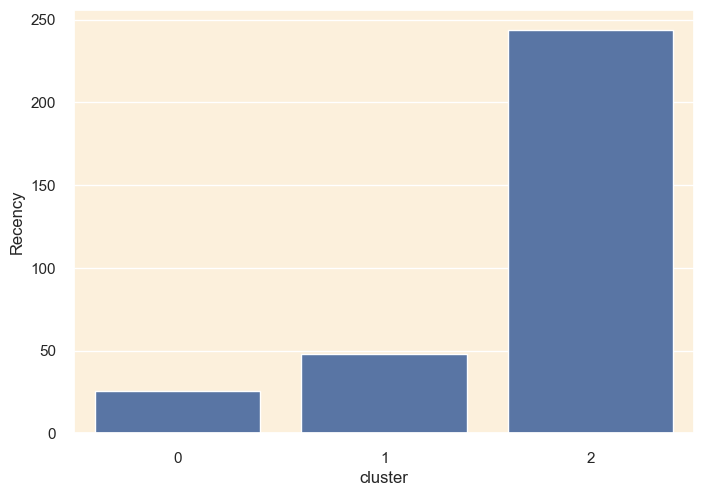

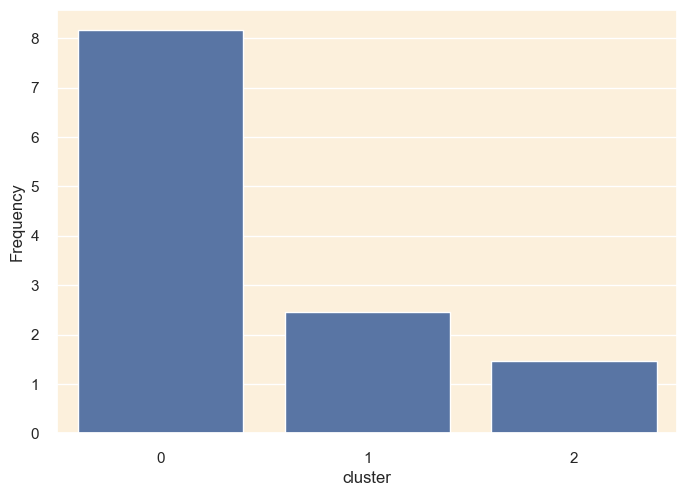

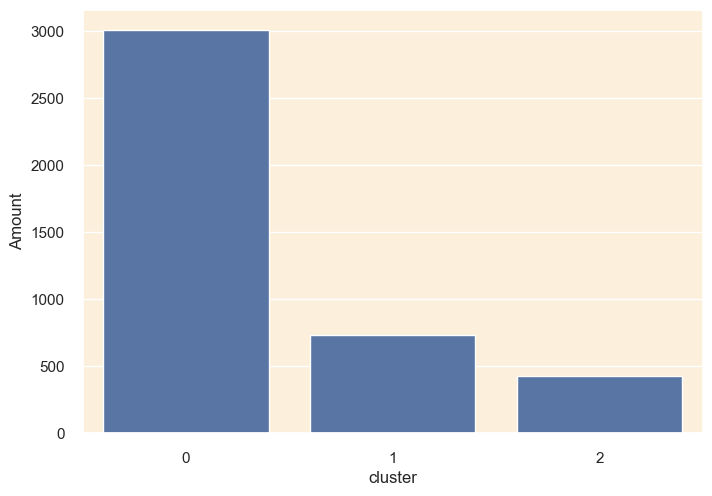

In [103]:
avg_df = rfm_cluster.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()